In [154]:
#Open text file
text = open('txt-uva-assignment.txt').read()
print(text)

<doc>
<docno> LA010189-0001 </docno>
<docid> 1 </docid>
<date>
<p>
January 1, 1989, Sunday, Home Edition 
</p>
</date>
<section>
<p>
Book Review; Page 1; Book Review Desk 
</p>
</section>
<length>
<p>
1206 words 
</p>
</length>
<headline>
<p>
NEW FALLOUT FROM CHERNOBYL; 
</p>
<p>
THE SOCIAL IMPACT OF THE CHERNOBYL DISASTER BY DAVID R. MARPLES (ST. MARTIN'S 
PRESS: $35, CLOTH; $14.95, PAPER; 316 PP., ILLUSTRATED; 0-312-02432-0) 
</p>
</headline>
<byline>
<p>
By James E. Oberg , Oberg, a space engineer in Houston, is the author of 
Uncovering Soviet Disasters: Exploring the Limits of Glasnost (Random House). 
</p>
</byline>
<text>
<p>
The onset of the new Gorbachev policy of glasnost, commonly mistranslated as 
openness but closer in connotation to candor or publicizing, has complicated 
the task of Soviet secret-keepers and has allowed substantial new Western 
insights into Soviet society. David R. Marples' new book, his second on the 
Chernobyl accident of April 26, 1986, is a shining 

In [155]:
import re
import inflection
class article_analysis:
    
    def __init__(self, corpus):
        self.corpus = corpus
        self.articles_count = len(corpus.split('</doc>')) - 1
        self.raw_articles = corpus.split('</doc>')[0:self.articles_count]
        
        clean_article = []
        for article in self.raw_articles:
            article = re.sub(r'</?[a-z]+>', '', article)
            article = re.sub(r'\n', '', article)
            article = re.sub(r"[^a-zA-Z0-9' -]","", article)
            article = article.lower()
            clean_article.append(article)
        self.clean_articles = clean_article
        
        dictionary = {}
        article_nb = 0
        for article in self.clean_articles:
            article_nb += 1
            for word in article.split(' '):
                #Inflects word into singular, a lists of exceptions is given
                if word not in ['is', 'this', 'was', 'his', 'its', 'thus', 'as', 'has', 'obvious' ]:
                    word = inflection.singularize(word)
                    
                if word:
                    if word not in dictionary:
                        #First occurence of the word in the corpus
                        dictionary[word] = {}
                        dictionary[word][article_nb] = 1
                    else:
                        if article_nb not in dictionary[word]:
                            #First occurence of the word in the article
                            dictionary[word][article_nb] = 1
                        else:
                            #Second occurences
                            dictionary[word][article_nb] += 1
                        
        self.dictionary = dictionary
        
        dictionary_global = {}
        for article in self.clean_articles:
            for word in article.split(' '):
                #Inflects word into singular, a lists of exceptions is given
                if word not in ['is', 'this', 'was', 'his', 'its', 'thus', 'as', 'has', 'obvious' ]:
                    word = inflection.singularize(word)
                    
                if word:
                    if word not in dictionary_global:
                        #First occurence of the word in the corpus
                        dictionary_global[word] = 1
                    else:
                        dictionary_global[word] += 1
                        
        self.dictionary_global = dictionary_global
                       
la_time = article_analysis(text)

In [156]:
#Word count
word_count = la_time.dictionary
word_count

{'la010189-0001': {1: 1},
 '1': {1: 3, 2: 1, 3: 2},
 'january': {1: 1, 2: 1, 3: 1},
 '1989': {1: 1, 2: 1, 3: 3},
 'sunday': {1: 1, 2: 1, 3: 1},
 'home': {1: 1, 2: 1, 3: 2},
 'edition': {1: 2, 2: 1, 3: 1},
 'book': {1: 11, 2: 3},
 'review': {1: 3, 2: 3},
 'page': {1: 1, 2: 2, 3: 1},
 'desk': {1: 1, 2: 1, 3: 1},
 '1206': {1: 1},
 'word': {1: 2, 2: 1, 3: 1},
 'new': {1: 4, 3: 5},
 'fallout': {1: 1},
 'from': {1: 3, 2: 1},
 'chernobyl': {1: 9},
 'the': {1: 106, 2: 12, 3: 69},
 'social': {1: 3, 3: 4},
 'impact': {1: 3},
 'of': {1: 64, 2: 6, 3: 55},
 'disaster': {1: 6},
 'by': {1: 8, 2: 4, 3: 9},
 'david': {1: 2},
 'r': {1: 2, 3: 1},
 'marple': {1: 5},
 'st': {1: 1},
 "martin'": {1: 1},
 'press': {1: 2},
 '35': {1: 1},
 'cloth': {1: 1},
 '1495': {1: 1},
 'paper': {1: 1},
 '316': {1: 1},
 'pp': {1: 1},
 'illustrated': {1: 1},
 '0-312-02432-0': {1: 1},
 'jame': {1: 1, 3: 1},
 'e': {1: 1},
 'oberg': {1: 2},
 'a': {1: 29, 2: 4, 3: 23},
 'space': {1: 1},
 'engineer': {1: 1, 3: 1},
 'in': {1: 29, 

In [158]:
#Histogram
word_count_global = la_time.dictionary_global
word_count_global

{'la010189-0001': 1,
 '1': 6,
 'january': 3,
 '1989': 5,
 'sunday': 3,
 'home': 4,
 'edition': 4,
 'book': 14,
 'review': 6,
 'page': 4,
 'desk': 3,
 '1206': 1,
 'word': 4,
 'new': 9,
 'fallout': 1,
 'from': 4,
 'chernobyl': 9,
 'the': 187,
 'social': 7,
 'impact': 3,
 'of': 125,
 'disaster': 6,
 'by': 21,
 'david': 2,
 'r': 3,
 'marple': 5,
 'st': 1,
 "martin'": 1,
 'press': 2,
 '35': 1,
 'cloth': 1,
 '1495': 1,
 'paper': 1,
 '316': 1,
 'pp': 1,
 'illustrated': 1,
 '0-312-02432-0': 1,
 'jame': 2,
 'e': 1,
 'oberg': 2,
 'a': 56,
 'space': 1,
 'engineer': 2,
 'in': 63,
 'houston': 1,
 'is': 34,
 'author': 8,
 'uncovering': 1,
 'soviet': 16,
 'exploring': 1,
 'limit': 2,
 'glasnost': 4,
 'random': 1,
 'house': 3,
 'onset': 1,
 'gorbachev': 2,
 'policy': 4,
 'commonly': 1,
 'mistranslated': 1,
 'as': 16,
 'openness': 2,
 'but': 11,
 'closer': 1,
 'connotation': 1,
 'to': 61,
 'candor': 1,
 'or': 10,
 'publicizing': 1,
 'has': 3,
 'complicated': 1,
 'task': 1,
 'secret-keeper': 1,
 'and': 

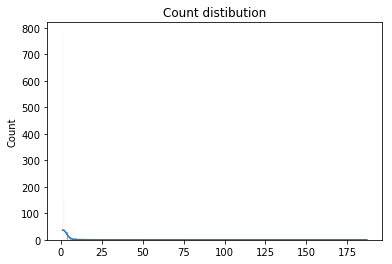

In [187]:
#Histograms
import seaborn as sns

observation_counts = []
for word in word_count_global:
    observation_counts.append(word_count_global[word])
    
plot = sns.histplot(observation_counts, kde=True).set_title('Count distibution')

Text(0.5, 1.0, 'Count distribution under 15 occurences')

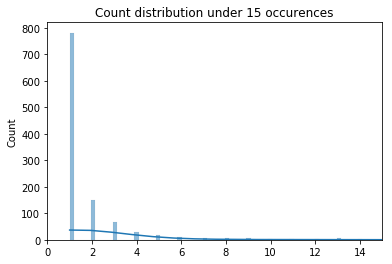

In [189]:
#A histogram on all data cannot be analyzed
#I plot a histogram for occurences under 15 for readability
plot_15 = sns.histplot(observation_counts, kde=True)
plot_15.set(xlim=(0,15))
plot_15.set_title('Count distribution under 15 occurences')

Text(0.5, 1.0, 'Count distribution above 1 occurences')

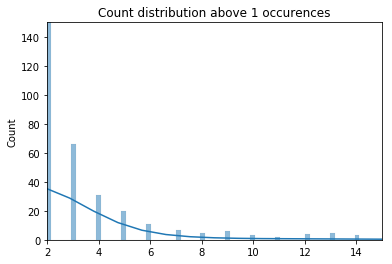

In [198]:
#I plot a histogram without word occuring once
plot_above1 = sns.histplot(observation_counts, kde=True)
plot_above1.set(xlim=(2,15))
plot_above1.set(ylim=(0,150))
plot_above1.set_title('Count distribution above 1 occurences')

In [199]:
#The distribution is highly skewed toward single occurence, the single occurence words are mostly proper nouns and context specific words.
#However the distribution's tail is very long. Words with largest occurences are "stop words" such as "the", "is", "that", ...
#To be more informative about texts' themes, we could remove stop words